In [1]:
# Load CSV file from my google drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
path = "/content/drive/MyDrive/Colab Notebooks/epa-sea-level.csv"

# Read data from file
df = pd.read_csv(path)

df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


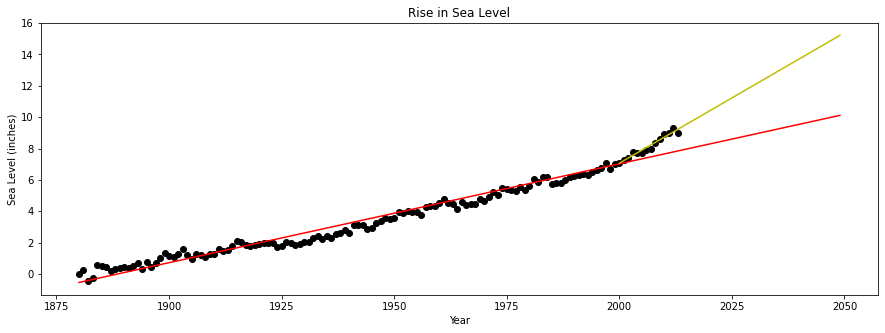

In [29]:
plt.figure(figsize=(15,5))

# Create scatter plot
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], color = "black")

# Create first line of best fit
slope, intercept, r_value, p_value, stderr = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

line_x = np.arange(df["Year"].min(), 2050, 1)
line_y = slope*line_x + intercept
plt.plot(line_x, line_y, "r")


# Create second line of best fit

df_2nd = df.loc[df["Year"]>=2000]

slope2, intercept2, r_value2, p_value2, stderr2 = linregress(df_2nd["Year"], df_2nd["CSIRO Adjusted Sea Level"])

line_x2 = np.arange(2000, 2050)
line_y2 = slope2*line_x2 + intercept2
plt.plot(line_x2, line_y2, "Y")

# Add labels and title

plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")


plt.show()
